# Exploratory Data Analysis

In [42]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss

In [43]:

# loading the train data
df = pd.read_csv('training_set.csv',index_col=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [44]:
#checking shape of data
df.shape

(3910, 58)

In [45]:
# checking the distribution of the  binary label
df['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

In [46]:
#checking missing values
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [47]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


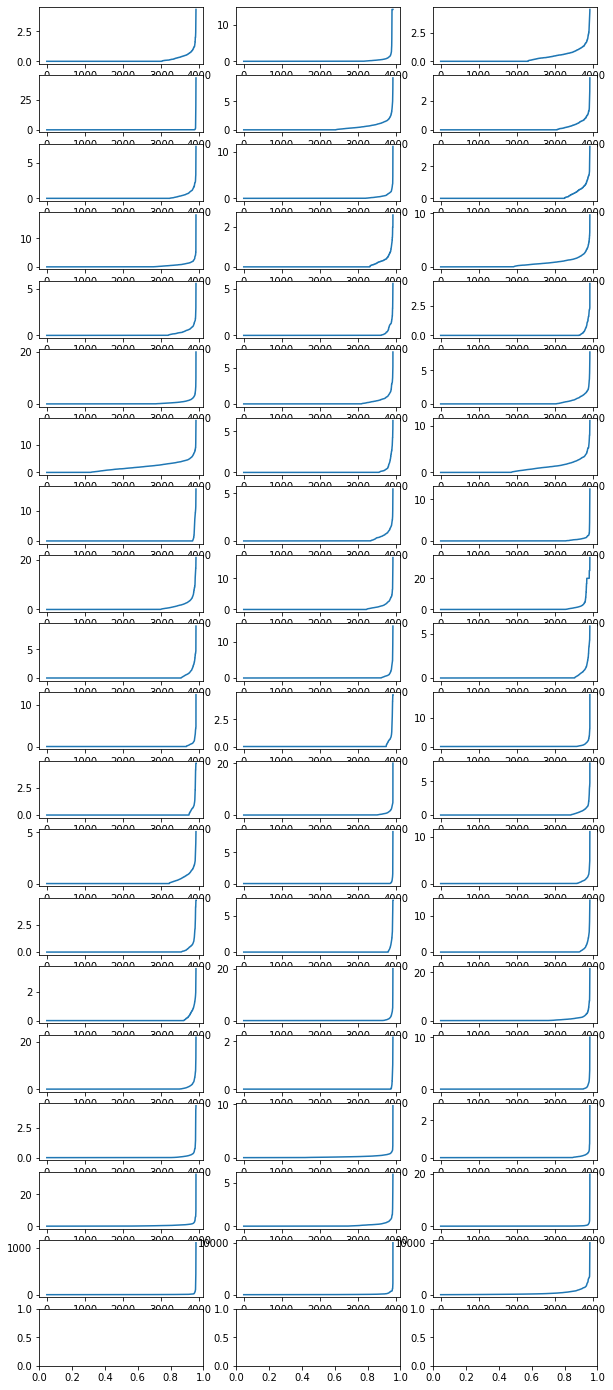

In [48]:
fig,ax = plt.subplots(nrows=20,ncols=3,figsize=(10,25))
j = 0
k = 0
for i in range(1,58):
    if k>2:
      k=0
      j= j+1
    ax[j][k].plot(sorted(df['X'+str(i)]));
    k=k+1

In [49]:
#splitting data into X and Y
X = df.drop(['Y'],axis=1)
y = df['Y']

In [50]:
#splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Feature Selection

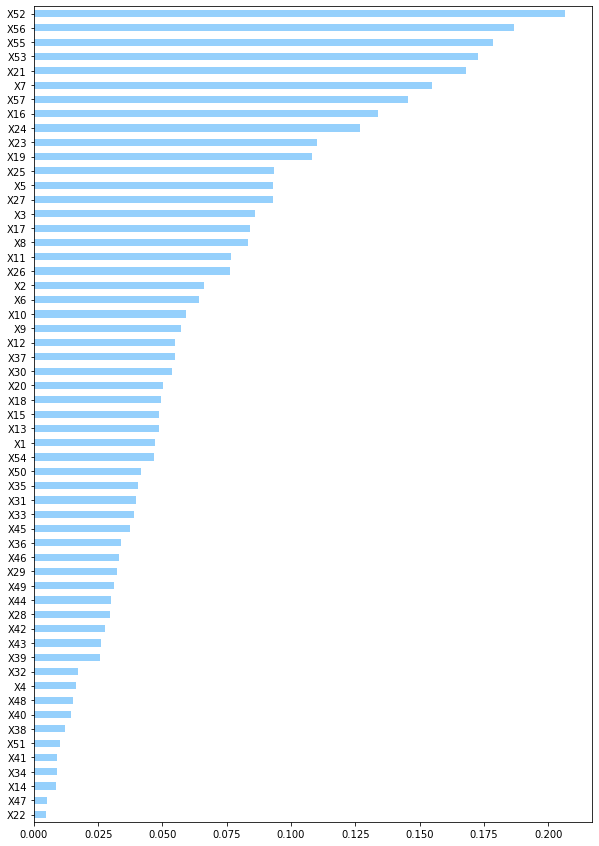

In [51]:
#feature selection using mutual information

importance = mutual_info_classif(X, y)
feat_importance = pd.Series(importance, index=X.columns[:])
feat_importance.sort_values().plot(kind='barh', color=sns.xkcd_rgb['light blue'], figsize=[10,15])
plt.show()

In [52]:
top_features = feat_importance[feat_importance > 0.05].index.to_list()
len(top_features)

27

In [53]:
# Selecting the top features from data
X_train_dash = X_train[top_features]
X_test_dash = X_test[top_features]

In [54]:
# Checking the shape of X_train_dash
X_train_dash.shape

(3128, 27)

In [55]:
# Checking the shape of X_test_dash
X_test_dash.shape

(782, 27)

#Normalizing Data

In [56]:
# Using StandardScaler to normalize our data
scaler = StandardScaler()
scaler.fit(X_train_dash)

# transform
X_train_dash = pd.DataFrame(scaler.transform(X_train_dash),columns=X_train_dash.columns)
X_test_dash = pd.DataFrame(scaler.transform(X_test_dash),columns=X_test_dash.columns)

#Training

##Random Model


In [57]:
#y_pred_test = np.random.binomial(1,0.5,size=len(X_test_dash))
y_train_prob = np.random.rand(len(X_train_dash))
y_test_prob = np.random.rand(len(X_test_dash))

# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 1.005149843240553
Test Logloss for the model -> 1.075756641422011
--------------------------------------------------
Train AUC Score for the model -> 0.5029639528288419
Test AUC Score for the model -> 0.4594205383164753


##Logistic Regression

In [58]:
# Using l2 norm
estimator = LogisticRegression(penalty='l2', max_iter=275, random_state=50)
parameters = {'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}

# Performing GridSearchCV
clf = GridSearchCV(estimator, parameters, cv=5, n_jobs=-1, scoring='neg_log_loss', return_train_score=True)
clf.fit(X_train_dash, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=275, random_state=50),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0]},
             return_train_score=True, scoring='neg_log_loss')

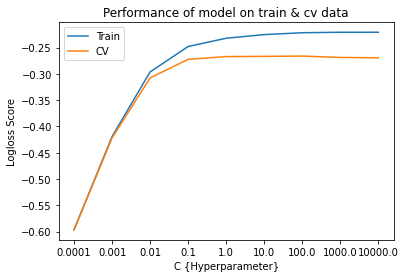

In [59]:
# Storing all the results of GridSearchCV in a DataFrame
results = pd.DataFrame.from_dict(clf.cv_results_)
#results.head()

x = list(map(str,results['param_C'].values))
y1 = results['mean_train_score'].values
y2 = results['mean_test_score'].values

plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='CV')
plt.legend()
plt.xlabel('C {Hyperparameter}')
plt.ylabel('Logloss Score')
plt.title('Performance of model on train & cv data');

##Decision Tree

In [60]:
# Using Decision Tree
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=3,random_state=50)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.006480552197262438
Test Logloss for the model -> 3.630982612999546
--------------------------------------------------
Train AUC Score for the model -> 0.9999575567614007
Test AUC Score for the model -> 0.8861477798731355


##Random Forest

In [61]:
# Using Random Forest
classifier = RandomForestClassifier(n_estimators=1000,
                                      max_depth=None,
                                      min_samples_split=3,
                                      n_jobs=-1,
                                      class_weight='balanced',
                                      random_state=50)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.052364384315624145
Test Logloss for the model -> 0.1592106656802531
--------------------------------------------------
Train AUC Score for the model -> 0.9999886389310819
Test AUC Score for the model -> 0.9888976512943597


XgBoost

In [62]:
# Using Xgboost
classifier = XGBClassifier(n_estimators=1000,
                           max_depth=5,
                           learning_rate=0.15,
                           colsample_bytree=1,
                           subsample=1,
                           reg_alpha = 0.5,
                           gamma=10,
                           n_jobs=-1,
                           eval_metric='logloss',
                           use_label_encoder=False)

classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.15783383866326642
Test Logloss for the model -> 0.18167076558660705
--------------------------------------------------
Train AUC Score for the model -> 0.985610027236555
Test AUC Score for the model -> 0.9822355563175038


#Performing Predictions on Test Data

In [63]:
#importing test data
df_test = pd.read_csv("test_set.csv")

In [64]:
# Selecting the top features for test data
test_data_dash = df_test[top_features]

In [65]:
# Using StandardScaler to normalize our test data
test_data_dash = pd.DataFrame(scaler.transform(test_data_dash),columns=test_data_dash.columns)

In [66]:
y_test_pred = classifier.predict(test_data_dash)
print(y_test_pred)

[0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 

In [67]:
submission = pd.DataFrame({'':df_test['Unnamed: 0'], 'Y':y_test_pred})
submission.to_csv('submission.csv', index=False)

In [68]:
#creating a requirements.txt folder
!pip freeze > requirements.txt